<a href="https://colab.research.google.com/github/KukavicaHome/Skeleton-Robot/blob/main/SkeletonRobot_desnanoga_naprijed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

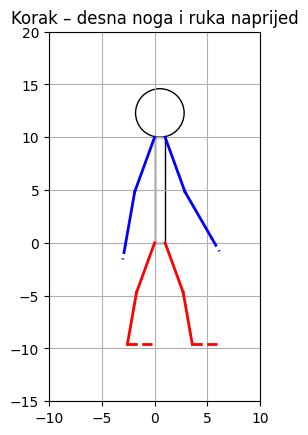

In [1]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Funkcija za rotaciju segmenta
def next_point(origin, length, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = origin[0] + length * np.sin(angle_rad)
    y = origin[1] - length * np.cos(angle_rad)
    return (x, y)

# Parametri
trup_width = 1
trup_height = 10
glava_radius = 2.3

nadlaktica = 5.5
podlaktica = 5
saka = 1.5
natkoljenica = 5
potkoljenica = 5
stopalo = 2.5

# Uglovi u stepenima
uglovi = {
    'desna_ruka_rame': 20,
    'desna_ruka_lakat': 10,
    'lijeva_ruka_rame': -20,
    'lijeva_ruka_lakat': -10,
    'desna_noga_kuk': 20,
    'desna_noga_koljeno': -10,
    'lijeva_noga_kuk': -20,
    'lijeva_noga_koljeno': 10,
}

# Početne tačke
trup_bottom = (0, 0)
trup_top = (0, trup_height)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Rame i kuk – referentne tačke
rame_d = (trup_width, trup_height)
rame_l = (0, trup_height)
kuk_d = (trup_width, 0)
kuk_l = (0, 0)

# Desna ruka
lakat_d = next_point(rame_d, nadlaktica, uglovi['desna_ruka_rame'])
zglob_d = next_point(lakat_d, podlaktica, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])
saka_d = next_point(zglob_d, saka, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])

# Lijeva ruka (ispravka: podlaktica i šaka savijaju se suprotno od lakta)
lakat_l = next_point(rame_l, nadlaktica, uglovi['lijeva_ruka_rame'])
zglob_l = next_point(lakat_l, podlaktica, uglovi['lijeva_ruka_rame'] - uglovi['lijeva_ruka_lakat'])  # OVDJE ISPRAVKA
saka_l = next_point(zglob_l, saka, uglovi['lijeva_ruka_rame'] - uglovi['lijeva_ruka_lakat'])        # OVDJE ISPRAVKA

# Desna noga
koljeno_d = next_point(kuk_d, natkoljenica, uglovi['desna_noga_kuk'])
glezanj_d = next_point(koljeno_d, potkoljenica, uglovi['desna_noga_kuk'] + uglovi['desna_noga_koljeno'])
stopalo_d = (glezanj_d[0] + stopalo, glezanj_d[1])

# Lijeva noga
koljeno_l = next_point(kuk_l, natkoljenica, uglovi['lijeva_noga_kuk'])
glezanj_l = next_point(koljeno_l, potkoljenica, uglovi['lijeva_noga_kuk'] + uglovi['lijeva_noga_koljeno'])
stopalo_l = (glezanj_l[0] + stopalo, glezanj_l[1])

# Crtanje
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 20)

# Trup
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruke
ax.plot([rame_d[0], lakat_d[0]], [rame_d[1], lakat_d[1]], 'b-', linewidth=2)
ax.plot([lakat_d[0], zglob_d[0]], [lakat_d[1], zglob_d[1]], 'b-', linewidth=2)
ax.plot([zglob_d[0], saka_d[0]], [zglob_d[1], saka_d[1]], 'b--', linewidth=2)

ax.plot([rame_l[0], lakat_l[0]], [rame_l[1], lakat_l[1]], 'b-', linewidth=2)
ax.plot([lakat_l[0], zglob_l[0]], [lakat_l[1], zglob_l[1]], 'b-', linewidth=2)
ax.plot([zglob_l[0], saka_l[0]], [zglob_l[1], saka_l[1]], 'b--', linewidth=2)

# Noge
ax.plot([kuk_d[0], koljeno_d[0]], [kuk_d[1], koljeno_d[1]], 'r-', linewidth=2)
ax.plot([koljeno_d[0], glezanj_d[0]], [koljeno_d[1], glezanj_d[1]], 'r-', linewidth=2)
ax.plot([glezanj_d[0], stopalo_d[0]], [glezanj_d[1], stopalo_d[1]], 'r--', linewidth=2)

ax.plot([kuk_l[0], koljeno_l[0]], [kuk_l[1], koljeno_l[1]], 'r-', linewidth=2)
ax.plot([koljeno_l[0], glezanj_l[0]], [koljeno_l[1], glezanj_l[1]], 'r-', linewidth=2)
ax.plot([glezanj_l[0], stopalo_l[0]], [glezanj_l[1], stopalo_l[1]], 'r--', linewidth=2)

# Prikaz
plt.title("Korak – desna noga i ruka naprijed")
plt.grid(True)
plt.show()